# Figure 7: 

Vertical profiles of spatially averaged (a) cloud radiative and microphysical heating rates averaged between days 5 to 8. Panel (b) further shows the total latent heating calculated as the sum of cloud microphysical heating and heating from saturation adjustment. Panels (c) and (d) show the associated PV tendencies. The solid lines are for the CRH simulation, and the dashed lines are for REF simulation.

-----------------------

@ Behrooz Keshtgar, KIT

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xarray as xr

import warnings
warnings.filterwarnings("ignore")

import colorlegend

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.19.1
matplotlib: 3.3.0


In [3]:
# Dictionary for loading simulations
simdict = {
         'LC1-channel-4000x9000km-2km-0002' : {'res':'2.5km', 'radiation':0, 'rh':0.8, 'mphy':1}, # No radiation 
         'LC1-channel-4000x9000km-2km-0003' : {'res':'2.5km', 'radiation':1, 'rh':0.8, 'mphy':1}, # Cloud radiation 
         }

## 2- Loading datasets

In [4]:
# load temperature tendencies datasets on model levels
def load_simulations():
    ds_list = []
    for sim in list(simdict.keys()): 
        #print('Working on loading data for', sim)
        # loading remapped datasets (0.5x0.5 r)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        # datasets
        fname = path+"icon-ddt_temp*.nc"                                                                     
        ds_var = xr.open_mfdataset(fname).sel(lat=slice(10,80))
        # adding cloud-radiative heating rates and total physic tendency
        ds_var['ddt_temp_radsw'] = ds_var['ddt_temp_radswnw'] - ds_var['ddt_temp_radswcs']
        ds_var['ddt_temp_radlw'] = ds_var['ddt_temp_radlwnw'] - ds_var['ddt_temp_radlwcs']
        # deriving total physics heating rates
        if sim == 'LC1-channel-4000x9000km-2km-0002':
            ds_var['ddt_temp_totphy'] = ds_var['ddt_temp_mphy'] + ds_var['ddt_temp_pconv'] + ds_var['ddt_temp_turb'] + ds_var['ddt_temp_diff'] + ds_var['ddt_temp_drag']
        else:
            ds_var['ddt_temp_totphy'] = ds_var['ddt_temp_radlw'] + ds_var['ddt_temp_radsw'] + ds_var['ddt_temp_mphy'] + ds_var['ddt_temp_pconv'] + ds_var['ddt_temp_turb'] + ds_var['ddt_temp_diff'] + ds_var['ddt_temp_drag']
        ds_list.append(ds_var)    
        del ds_var
    return ds_list
#----------------------------------
ds_list_ddt_temp = load_simulations()
#----------------------------------
def load_simulations():
    ds_list = []
    for sim in list(simdict.keys()): 
        print('Working on loading data for', sim)
        path = '/work/bb1135/from_Mistral/bb1135/b381185/output/LC1_Limited_channel/icon-v.2.6.2.2_2km/sim_list_output/'+sim+'_remapped_0.5x0.5/'
        # datasets
        fname = path+"pv_tendencies.nc"
        ds_var = xr.open_mfdataset(fname).sel(lat=slice(10,80))
        ds_list.append(ds_var)
        del ds_var
    return ds_list
#----------------------------------
ds_list = load_simulations()
#----------------------------------

Working on loading data for LC1-channel-4000x9000km-2km-0002
Working on loading data for LC1-channel-4000x9000km-2km-0003


## 3- Vertical profiles

In [5]:
# deriving Vertical profiles of heating rates and PV tendencies averaged from day 5 to 8
def spin(var,time1,time2):
    si = (var.mean(axis=(2,3)).sel(time=slice(time1,time2)).mean('time'))
    return(si)

# heating rates
radlw_1 = spin(ds_list_ddt_temp[1].ddt_temp_radlw,20210106,20210109).compute()
radsw_1 = spin(ds_list_ddt_temp[1].ddt_temp_radsw,20210106,20210109).compute()
gscp_1  = spin(ds_list_ddt_temp[1].ddt_temp_gscp,20210106,20210109).compute()
gscp_0  = spin(ds_list_ddt_temp[0].ddt_temp_gscp,20210106,20210109).compute() # REF simulation
mphy_1  = spin(ds_list_ddt_temp[1].ddt_temp_mphy,20210106,20210109).compute()
mphy_0  = spin(ds_list_ddt_temp[0].ddt_temp_mphy,20210106,20210109).compute() # REF simulation

# dibatic pv tendencies
pvt_radlw_1 = spin(ds_list[1]['ddt_pv_radlw'],20210106,20210109).compute()
pvt_radsw_1 = spin(ds_list[1]['ddt_pv_radsw'],20210106,20210109).compute()
pvt_gscp_1  = spin(ds_list[1]['ddt_pv_gscp'],20210106,20210109).compute()
pvt_gscp_0  = spin(ds_list[0]['ddt_pv_gscp'],20210106,20210109).compute() # REF simulation
pvt_mphy_1  = spin(ds_list[1]['ddt_pv_mphy'],20210106,20210109).compute()
pvt_mphy_0  = spin(ds_list[0]['ddt_pv_mphy'],20210106,20210109).compute() # REF simulation

## 4- Plot

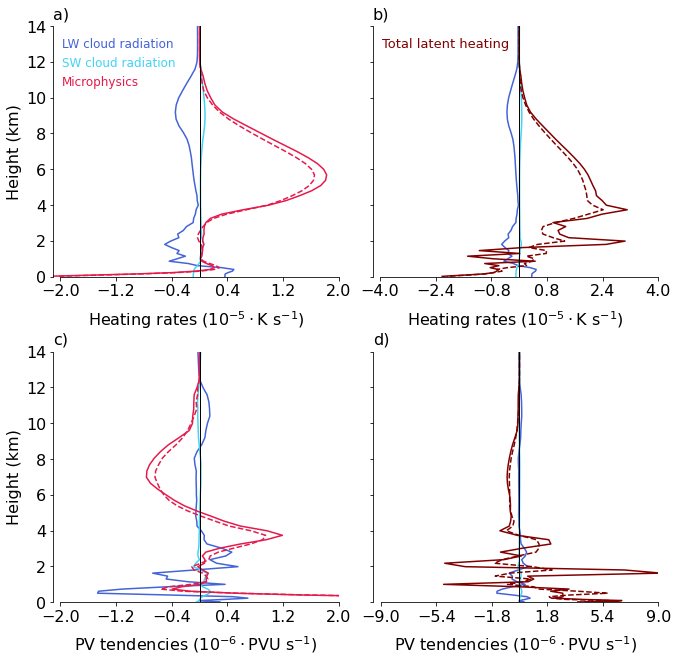

In [7]:
lev = ds_list[0].z_fl[0,:,50,50].values/1000 # km
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

i = 0

for ax in axes.flat:
    
    ax.tick_params(labelsize=16)       
    ax.spines['left'].set_bounds(0,14)
    ax.set_yticks(np.arange(0,16,2))
    ax.set_ylim([0,14])
       
    if i == 0:
        ax.plot(radlw_1*1e5,lev,'#4363d8',label='LW cloud radiation',linewidth=1.5)
        ax.plot(radsw_1*1e5,lev,'#42d4f4',label='SW cloud radiation',linewidth=1.5)
        ax.plot(gscp_1*1e5,lev,'#e6194B',label='Microphysics',linewidth=1.5)
        ax.plot(gscp_0*1e5,lev,'#e6194B',linewidth=1.5,linestyle='dashed')
        lg=colorlegend.color_legend(ax,loc=2,fsize=12)
        ax.tick_params(left=True,right=False)
        #ax.set_title('Heating rates', fontsize=15)
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.set_ylabel('Height (km)', fontsize=16)
        ax.set_xlabel('Heating rates ($10^{-5} \cdot $K s$^{-1}$)', fontsize=16,labelpad=10)
        ax.ticklabel_format(style='sci',scilimits=(0,0),axis='x')
        ax.spines['bottom'].set_bounds(-2,2)
        ax.set_xticks(np.linspace(-2,2,6))
        ax.set_xlim([-2.1,2])
        ax.text(0.0, 1.03, 'a)', transform=ax.transAxes, 
            size=16 )
        
    if i == 1:
        ax.plot(radlw_1*1e5,lev,'#4363d8',linewidth=1.5)
        ax.plot(radsw_1*1e5,lev,'#42d4f4',linewidth=1.5)
        ax.plot(mphy_1*1e5,lev,'#800000',label='Total latent heating',linewidth=1.5)
        ax.plot(mphy_0*1e5,lev,'#800000',linewidth=1.5,linestyle='dashed')
        lg=colorlegend.color_legend(ax,loc=2,fsize=13)
        ax.tick_params(left=True,right=False)
        #ax.set_title('Heating rates', fontsize=15)
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.set_yticklabels([])
        ax.set_xlabel('Heating rates ($10^{-5} \cdot $K s$^{-1}$)', fontsize=16,labelpad=10)
        ax.ticklabel_format(style='sci',scilimits=(0,0),axis='x')
        ax.spines['bottom'].set_bounds(-4,4)
        ax.set_xticks(np.linspace(-4,4,6))
        ax.set_xlim([-4.2,4])
        ax.text(0.0, 1.03, 'b)', transform=ax.transAxes, 
            size=16 )    
        
    if i == 2:
        ax.plot(pvt_radlw_1*1e6*1e6,lev,'#4363d8',linewidth=1.5)
        ax.plot(pvt_radsw_1*1e6*1e6,lev,'#42d4f4',linewidth=1.5)
        ax.plot(pvt_gscp_1*1e6*1e6,lev,'#e6194B',linewidth=1.5)
        ax.plot(pvt_gscp_0*1e6*1e6,lev,'#e6194B',linewidth=1.5,linestyle='dashed')
        ax.tick_params(left=True,right=False)
        #ax.set_title('PV tendencies', fontsize=16)
        ax.set_xlabel('PV tendencies ($10^{-6} \cdot $PVU s$^{-1}$)', fontsize=16,labelpad=10)
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.spines['top'].set_color('none')
        ax.set_ylabel('Height (km)', fontsize=16)
        ax.spines['right'].set_color('none')
        ax.ticklabel_format(style='sci',scilimits=(0,0),axis='x')
        ax.spines['bottom'].set_bounds(-2,2)
        ax.set_xticks(np.linspace(-2,2,6))
        ax.set_xlim([-2.1,2])
        ax.text(0.0, 1.03, 'c)', transform=ax.transAxes, 
            size=16 )
        
    if i == 3:
        ax.plot(pvt_radlw_1*1e6*1e6,lev,'#4363d8',linewidth=1.5)
        ax.plot(pvt_radsw_1*1e6*1e6,lev,'#42d4f4',linewidth=1.5)
        ax.plot(pvt_mphy_1*1e6*1e6,lev,'#800000',linewidth=1.5)
        ax.plot(pvt_mphy_0*1e6*1e6,lev,'#800000',linewidth=1.5,linestyle='dashed')
        ax.tick_params(left=True,right=False)
        #ax.set_title('PV tendencies', fontsize=16)
        ax.set_xlabel('PV tendencies ($10^{-6} \cdot $PVU s$^{-1}$)', fontsize=16,labelpad=10)
        ax.axvline(x=0, ymin=0.0, ymax=1,c='black', lw=1)
        ax.spines['top'].set_color('none')
        #ax.set_ylabel('Height (Km)', fontsize=16)
        ax.set_yticklabels([])
        ax.spines['right'].set_color('none')
        ax.ticklabel_format(style='sci',scilimits=(0,0),axis='x')
        ax.spines['bottom'].set_bounds(-9,9)
        ax.set_xticks(np.linspace(-9,9,6))
        ax.set_xlim([-9.5,9])
        ax.text(0.0, 1.03, 'd)', transform=ax.transAxes, 
            size=16 )    
        
    i = i + 1 
    
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.12, hspace=0.3)   

plt.savefig('figure7.pdf', bbox_inches = 'tight')
#plt.savefig('figure7.png', bbox_inches = 'tight',dpi=100)